# FINAL PROJECT
## DASAR PENGOLAHAN SINYAL (A)

### AHMAD FARHAT 
### 5023221060

## ECG DAVIS

### Import dan Parameter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fs = 125 # Frekuensi Sampling (Hz)
fc = 50 # Frekuensi Cut-Off (Hz)
fcl = 8 # Frekuensi Cut-Off Rendah
fch = 15 # Frekuensi Cut-Off Tinggi
M = 1 # Order

### Masukkan Data dan Baca

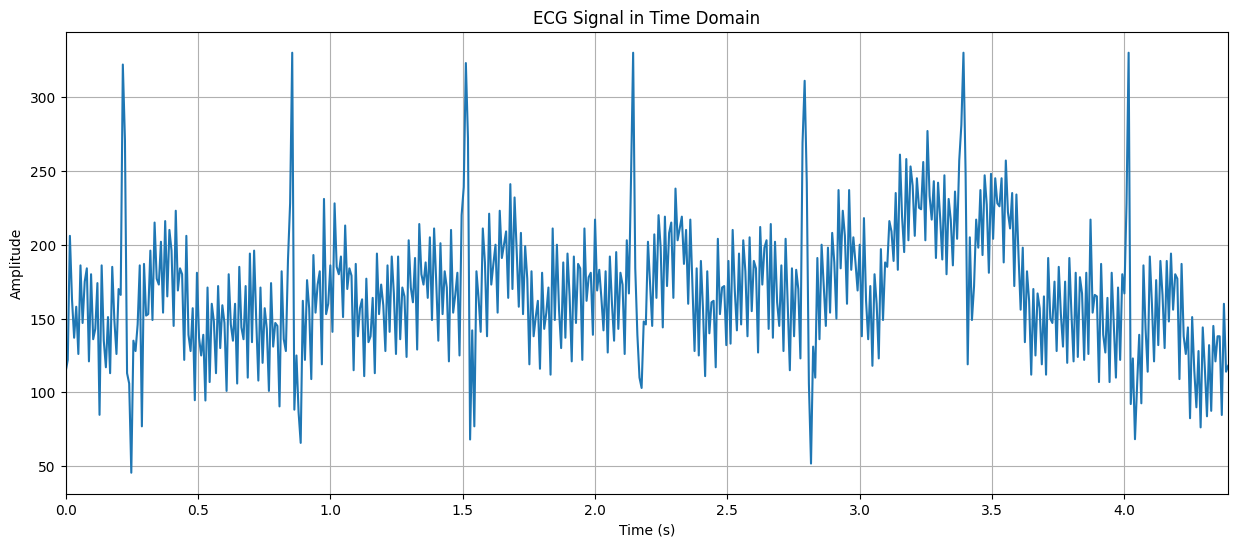

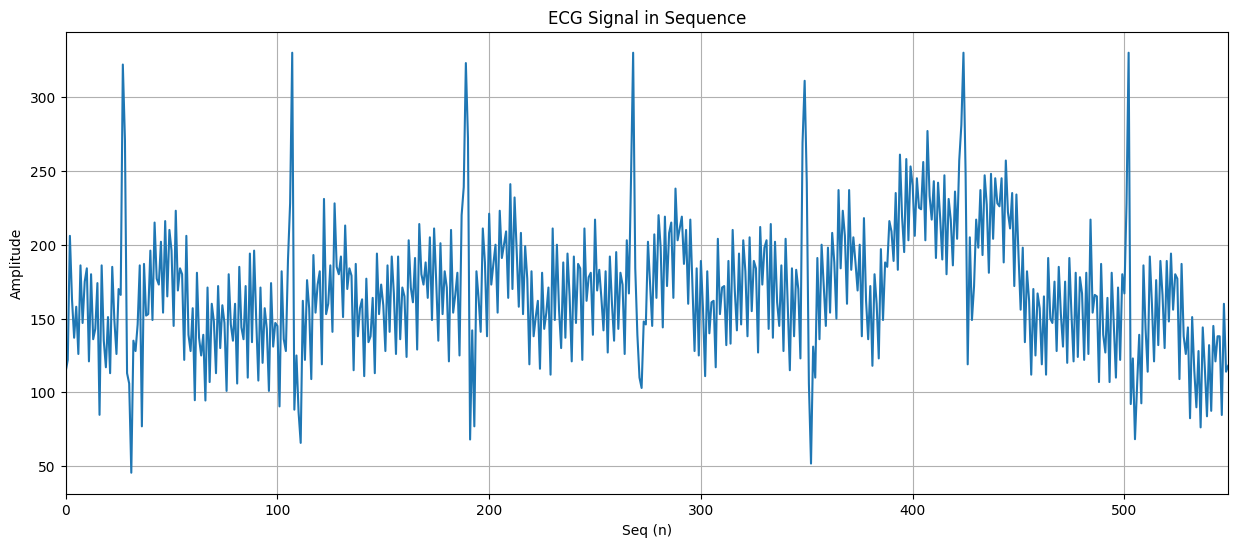

In [2]:
# Masukkan Data dan Baca

# Masuukan ECG data
df = pd.read_csv('Data ECG Levy.txt', delimiter='\t')
df.columns = ['waktu', 'amplitudo']

# Buat time vector berdasarkan jumlah sampel dan Frekuensi Sampling
waktu_sinyal = np.arange(len(df['amplitudo'])) / fs
sekuens_sinyal = df['waktu']
#signal_sinyal = df['amplitudo']

# Tentukan ukuran plot nya
plt.figure(figsize=(15, 6))  # Adjust width and height as needed
# Plot Data-nya
plt.plot(waktu_sinyal, df['amplitudo'])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ECG Signal in Time Domain')
# Atur batas x-axis pada time vector
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
# Tunjukkan garis dari grid
plt.grid(True)
# Tunjukkan plotnya
plt.show()

plt.figure(figsize=(15,6))
plt.plot(df['waktu'], df['amplitudo'])
plt.xlabel('Seq (n)')
plt.ylabel('Amplitude')
plt.title('ECG Signal in Sequence')
plt.xlim(sekuens_sinyal.min(), sekuens_sinyal.max())
plt.grid()
plt.show()

### Baseline Restoration

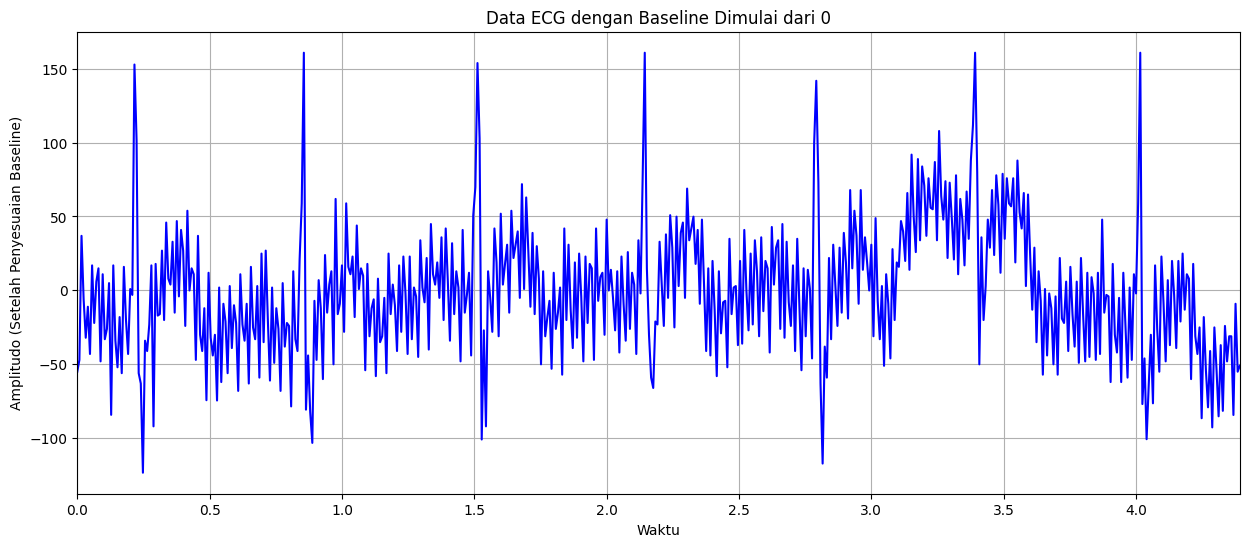

In [3]:
# Baseline Restoration

# Mendapatkan rata-rata amplitudo
baseline = np.mean(df['amplitudo'])
# Mengurangkan setiap nilai amplitudo dengan rata-rata amplitudo
restored_signal = df['amplitudo'] - baseline

# Plot data setelah penyesuaian baseline
plt.figure(figsize=(15, 6))
plt.plot(waktu_sinyal, restored_signal, color='blue')
plt.xlabel('Waktu')
plt.ylabel('Amplitudo (Setelah Penyesuaian Baseline)')
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.title('Data ECG dengan Baseline Dimulai dari 0')
plt.grid(True)
plt.show()

### DFT Sinyal Baseline Restoration

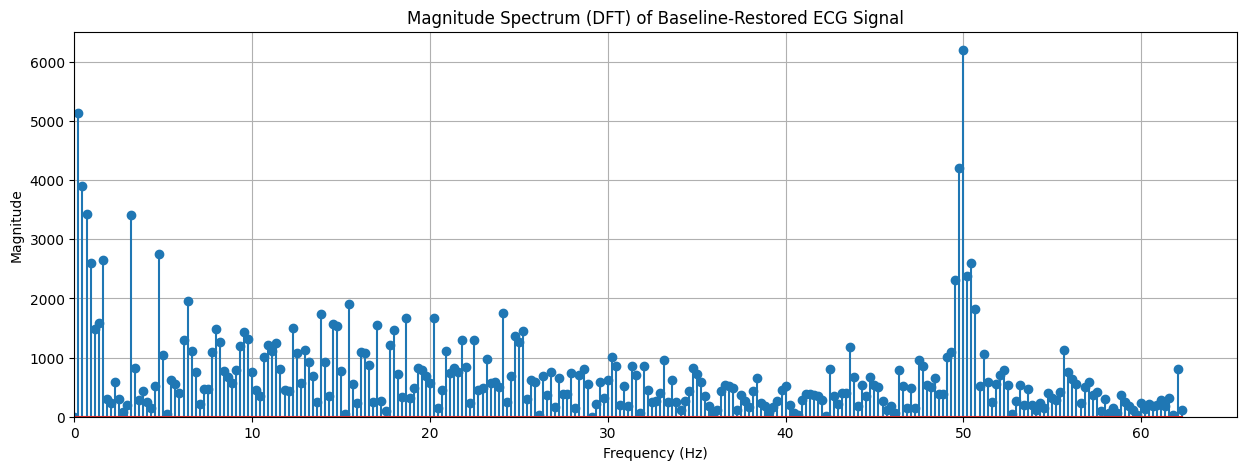

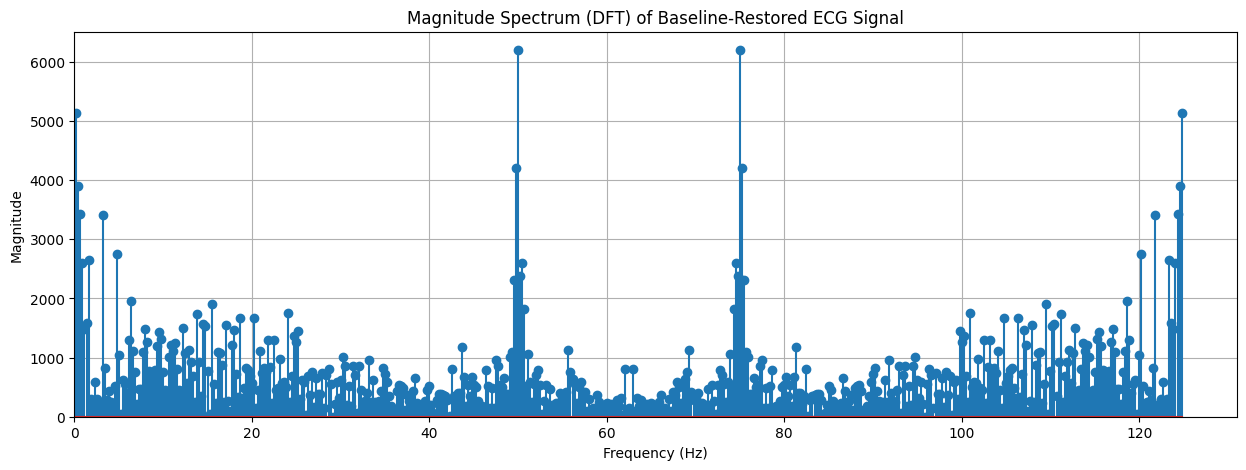

In [4]:
# DFT Sinyal Asli

# Fungsi dari Discrete Fourier Transform (DFT)
def DFT(x):
    N = len(x)
    X_real = np.zeros(N)
    X_imag = np.zeros(N)

    for k in range(N):
        for n in range(N):
            X_real[k] += x[n] * np.cos(2 * np.pi * k * n / N)
            X_imag[k] -= x[n] * np.sin(2 * np.pi * k * n / N)

    mag = np.sqrt(X_real**2 + X_imag**2)


    return mag

# Hitung DFT dari sinyal yang telah direstorasi
magDFT = DFT(restored_signal)

# Plot magnitude spectrum
freq = np.arange(len(magDFT)) * fs / len(magDFT)
freq_half = freq[:len(magDFT)//2]  # Half of the frequency range

plt.figure(figsize=(15, 5))
plt.stem(freq_half, magDFT[:len(magDFT)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(waktu_sinyal.min())
plt.ylim(magDFT[:len(magDFT)//2].min())
plt.title('Magnitude Spectrum (DFT) of Baseline-Restored ECG Signal')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.stem(freq, magDFT)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(waktu_sinyal.min())
plt.ylim(magDFT.min())
plt.title('Magnitude Spectrum (DFT) of Baseline-Restored ECG Signal')
plt.grid(True)
plt.show()

### Low-Pass Filter (Forward & Backward)

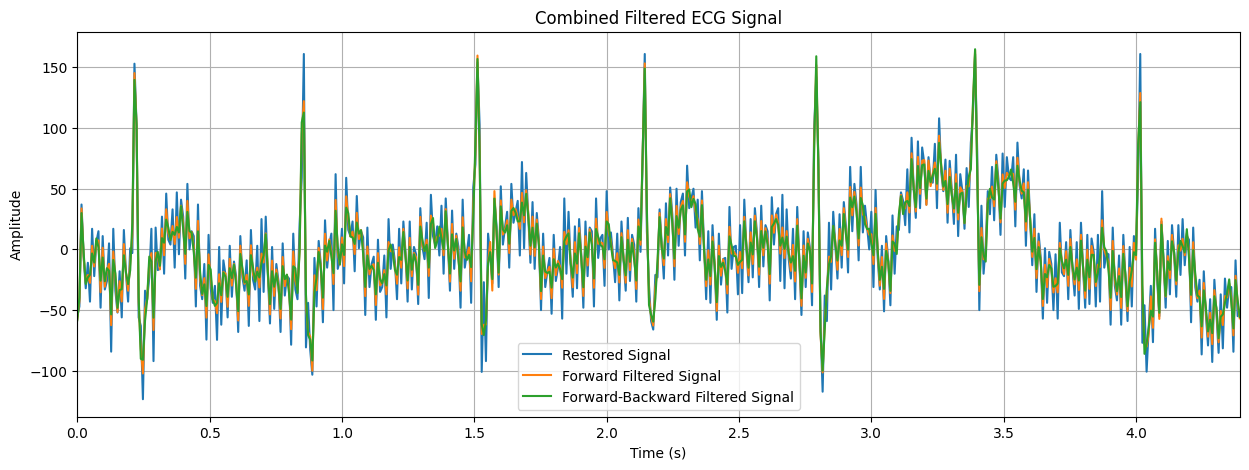

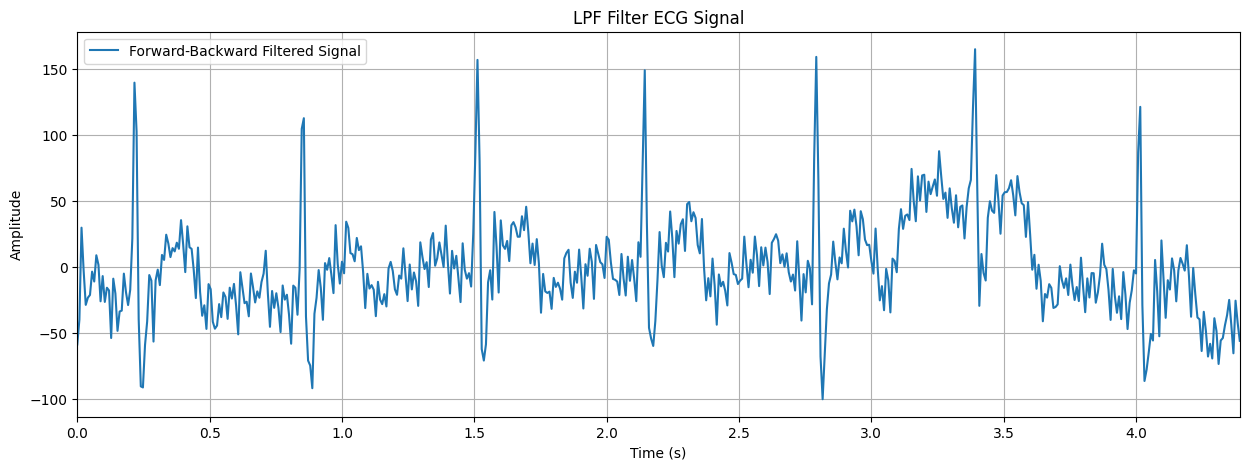

In [5]:
# Low Pass Filter (LPF)

# Hitung ohm_c cut-off frekuensinya
ohm_c = 2 * np.pi * fc / fs

fs = 125 # Frekuensi Sampling (Hz)
M_LPF1 = 5 # Order

# Hitung koefisien filter untuk low-pass filter dari order 3 (2M + 1, M = 1) # Atau masukkan Order yang diinginkan di atas
arr_M = np.arange(-M_LPF1, M_LPF1 + 1, 1)
h = np.zeros(2 * M_LPF1 + 1)
for n in range(-M_LPF1, M_LPF1 + 1, 1):
    if n == 0:
        h[n + M_LPF1] = ohm_c / np.pi
    else:
        h[n + M_LPF1] = np.sin(n * ohm_c) / (n * np.pi)

# Jumlah Point Data
N_LPF = len(restored_signal)

# low-pass filter untuk (Forward Filtering)
x_filtered_forward_LPF = np.zeros(N_LPF)

# Forward Filtering
for i in range(N_LPF):
    for j in range(-M_LPF1, M_LPF1 + 1, 1):
        if 0 <= i - j < N_LPF:  # Pastikan index berada pada batasnya
            x_filtered_forward_LPF[i] += h[j + M_LPF1] * restored_signal[i - j]

# low-pass filter untuk (Backward Filtering)
x_filtered_backward_LPF = np.zeros(N_LPF)

# Backward Filtering
for i in range(N_LPF-1, -1, -1):
    for j in range(-M_LPF1, M_LPF1 + 1, 1):
        if 0 <= i + j < N_LPF:  # Ensure index is within bounds
            x_filtered_backward_LPF[i] += h[j + M_LPF1] * x_filtered_forward_LPF[i + j]

# Plot forward and backward filtered ECG signal pada 1 plot yang sama
plt.figure(figsize=(15, 5))

plt.plot(waktu_sinyal, restored_signal, label='Restored Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Restored ECG Signal')
plt.legend()
plt.grid(True)

plt.plot(waktu_sinyal, x_filtered_forward_LPF, label='Forward Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Forward Filtered ECG Signal')
plt.legend()
plt.grid(True)


plt.plot(waktu_sinyal, x_filtered_backward_LPF, label='Forward-Backward Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Combined Filtered ECG Signal')
plt.legend()
plt.grid(True)

plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.show()

# Plot forward and backward filtered ECG signal nya
plt.figure(figsize=(15, 5))
plt.plot(waktu_sinyal, x_filtered_backward_LPF, label='Forward-Backward Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('LPF Filter ECG Signal')
plt.legend()
plt.grid(True)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.show()

### Moving Average 1 (MAV)

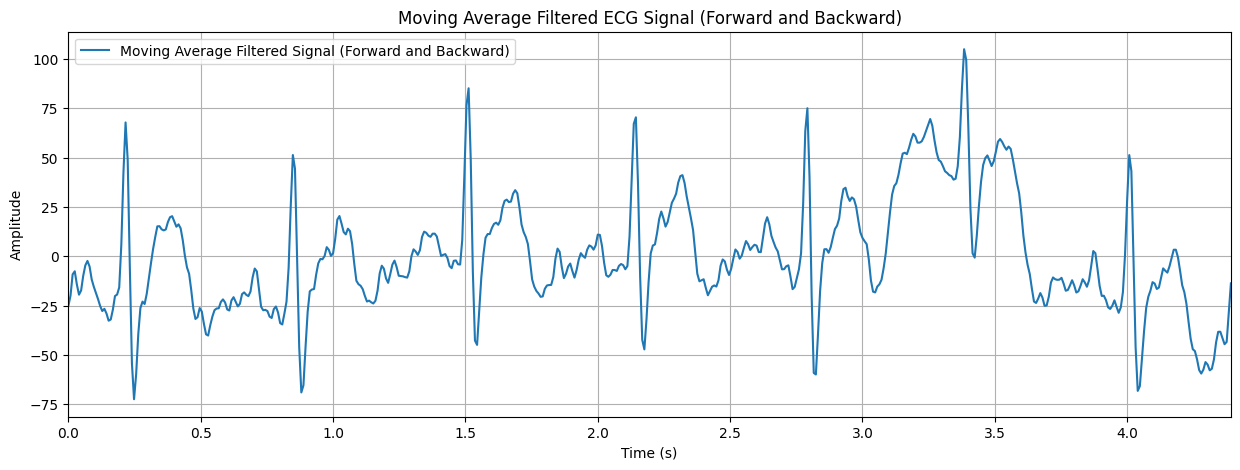

In [6]:
# Moving Average (MAV)

# Parameter
M_MAV = 3
N = len(x_filtered_backward_LPF)

# Initialize the moving average result arrays
df_MAV_forward = np.zeros(N)

# Moving Average Filter Forward
for idx in range(N):
    for shift in range(M_MAV):
        if idx - shift >= 0:
            df_MAV_forward[idx] += x_filtered_backward_LPF[idx - shift]
    df_MAV_forward[idx] /= M_MAV

# Initialize the moving average result arrays
N_2 = len(df_MAV_forward)
df_MAV_backward = np.zeros(N_2)
#N = len(df_MAV_forward)

# Moving Average Filter Backward
for idx in range(N_2):
    for shift in range(M_MAV):
        if idx + shift < N_2:
            df_MAV_backward[idx] += df_MAV_forward[idx + shift]
    df_MAV_backward[idx] /= M_MAV

df['Hasil MAV'] = df_MAV_backward

# Plotting the results
plt.figure(figsize=(15, 5))
plt.plot(waktu_sinyal, df_MAV_backward, label='Moving Average Filtered Signal (Forward and Backward)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Moving Average Filtered ECG Signal (Forward and Backward)')
plt.legend()
plt.grid(True)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.show()


### Segmentasi P, QRS, dan T

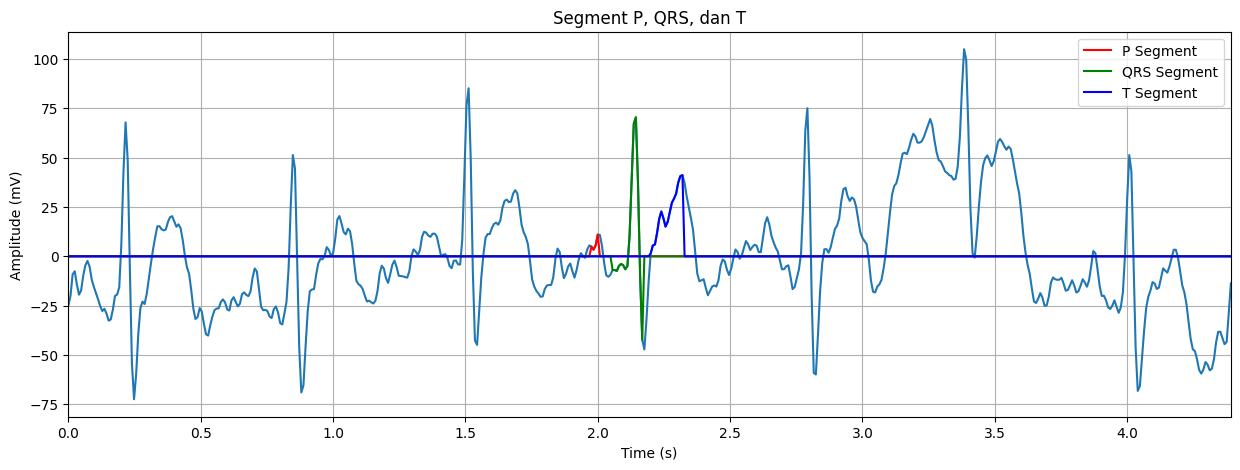

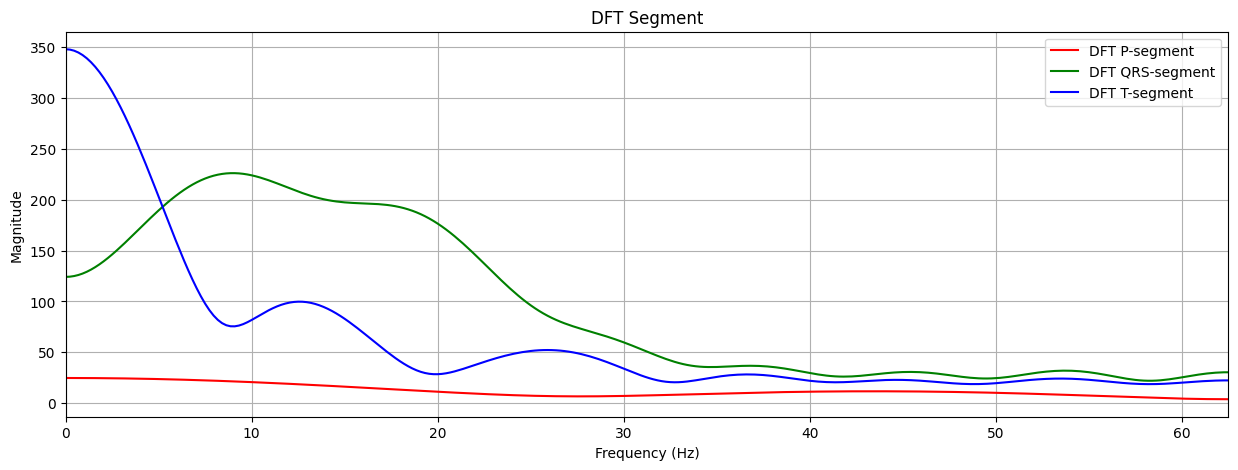

In [7]:
# Segmentasi the P, QRS, and T waves
x = np.arange(len(df['Hasil MAV']))
y_mav = df['Hasil MAV']

# Definisikan segmentasi berdasarkan hasil interval waktu

# Batas Awal dan Akhir Segmentasi Levy
mulai_p, akhir_p = 1.97, 2.00
mulai_qrs, akhir_qrs = 2.05, 2.17
mulai_t, akhir_t = 2.20, 2.32

# Buat bagian untuk setiap bagian segmentasi
bagian_p = (waktu_sinyal >= mulai_p) & (waktu_sinyal <= akhir_p)
bagian_qrs = (waktu_sinyal >= mulai_qrs) & (waktu_sinyal <= akhir_qrs)
bagian_t = (waktu_sinyal >= mulai_t) & (waktu_sinyal <= akhir_t)

# Buat bagian untuk setiap bagian segmentasi
segmen_P = np.where(bagian_p, y_mav, 0)
segmen_QRS = np.where(bagian_qrs, y_mav, 0)
segmen_T = np.where(bagian_t, y_mav, 0)

plt.figure(figsize=(15, 5))
plt.plot(waktu_sinyal, df['Hasil MAV'])
plt.plot(waktu_sinyal, segmen_P, label='P Segment',color='red')
plt.plot(waktu_sinyal, segmen_QRS, label='QRS Segment',color='green')
plt.plot(waktu_sinyal, segmen_T, label='T Segment', color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.title("Segment P, QRS, dan T")
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.legend()
plt.grid()
plt.show()

P_segment = np.zeros(len(df['Hasil MAV']))
for i in range(len(df['Hasil MAV'])):
    if mulai_p <= waktu_sinyal[i] <= akhir_p:
        P_segment[i] = df['Hasil MAV'][i]
N_P = len(P_segment)

QRS_segment = np.zeros(len(df['Hasil MAV']))
for i in range(len(df['Hasil MAV'])):
    if mulai_qrs <= waktu_sinyal[i] <= akhir_qrs:
        QRS_segment[i] = df['Hasil MAV'][i]
N_QRS = len(QRS_segment)

T_segment = np.zeros(len(df['Hasil MAV']))
for i in range(len(df['Hasil MAV'])):
    if mulai_t <= waktu_sinyal[i] <= akhir_t:
        T_segment[i] = df['Hasil MAV'][i]
N_T = len(T_segment)

# Fungsi Perhitungan DFT
def compute_dft(df):
    N = len(df)
    X_real = np.zeros(N)
    X_imaj = np.zeros(N)
    MagDFT = np.zeros(N)

    for k in range(N):
        for n in range(N):
            X_real[k] += df[n] * np.cos(2 * np.pi * k * n / N)
            X_imaj[k] -= df[n] * np.sin(2 * np.pi * k * n / N)
        MagDFT[k] = np.sqrt(X_real[k]**2 + X_imaj[k]**2)

    return MagDFT

# Hitung DFT Segmentasi
MagDFT_P = compute_dft(P_segment)
MagDFT_QRS = compute_dft(QRS_segment)
MagDFT_T = compute_dft(T_segment)

fs = 125  # Sampling frequency

# Buat array untuk frekuensi nya
freq_P = np.arange(0, len(P_segment)) * fs / len(P_segment)
freq_QRS = np.arange(0, len(QRS_segment)) * fs / len(QRS_segment)
freq_T = np.arange(0, len(T_segment)) * fs / len(T_segment)

# Plot DFT dari setiap segmentasi
plt.figure(figsize=(15, 5))
plt.plot(freq_P, MagDFT_P, label='DFT P-segment', color='red')
plt.plot(freq_QRS, MagDFT_QRS, label='DFT QRS-segment', color='green')
plt.plot(freq_T, MagDFT_T, label='DFT T-segment', color='blue')
plt.title("DFT Segment")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, fs / 2)
plt.grid()
plt.legend()
plt.show()


### Bandpass Filter (Foward & Backward)

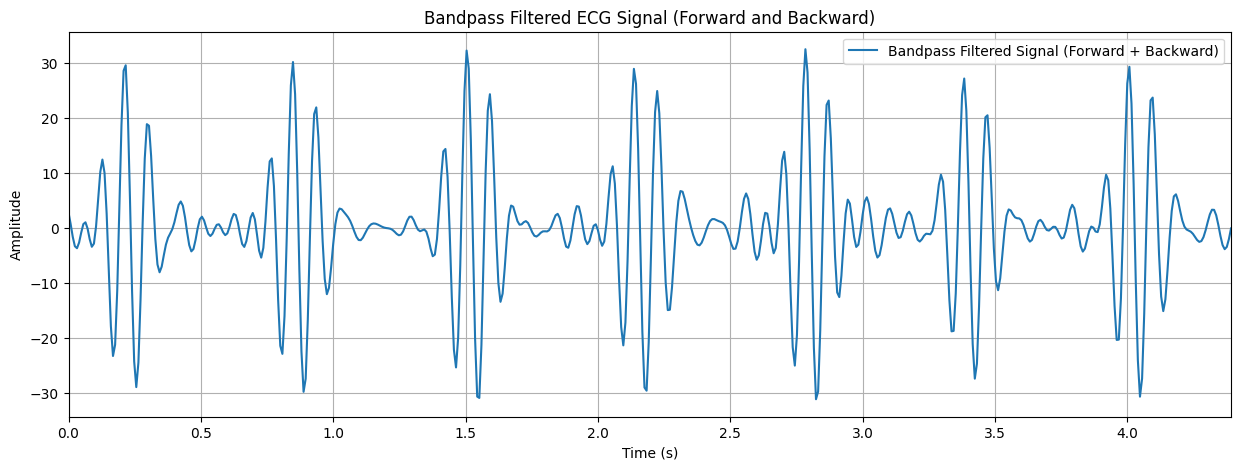

In [8]:

# Parameter
fs = 125  # Frekuensi Sampling (Hz)
fcl = 8   # Lower cutoff frequency (Hz)
fch = 15  # Higher cutoff frequency (Hz)
M_BP = 25 # Order dari Bandpass

# Hitung dan Definisikan koefisien filter untuk Bandpass Filter
def bandpass_filter_coeff(fcl, fch, fs, M_BP):
    h_bandpass = np.zeros(2 * M_BP + 1)
    for n in range(-M_BP, M_BP + 1):
        if n == 0:
            h_bandpass[n + M_BP] = (2 * np.pi * fch / fs) / np.pi - (2 * np.pi * fcl / fs) / np.pi
        else:
            h_bandpass[n + M_BP] = (np.sin(2 * np.pi * fch * n / fs) / (np.pi * n)) - (np.sin(2 * np.pi * fcl * n / fs) / (np.pi * n))
    return h_bandpass

# Hitung koefisien filter untuk Bandpass Filter
h_bandpass = bandpass_filter_coeff(fcl, fch, fs, M_BP)

# Forward Filtering
N = len(df_MAV_backward)
x_filtered_forward = np.zeros(N)
for i in range(N):
    for j in range(-M_BP, M_BP + 1):
        if 0 <= i - j < N:
            x_filtered_forward[i] += h_bandpass[j + M_BP] * df_MAV_backward[i - j]

# Backward Filtering
x_filtered_backward_BPF = np.zeros(N)
for i in range(N-1, -1, -1):
    for j in range(-M_BP, M_BP + 1):
        if 0 <= i + j < N:
            x_filtered_backward_BPF[i] += h_bandpass[j + M_BP] * x_filtered_forward[i + j]

filtered_bandpass = x_filtered_backward_BPF

# Plot bandpass filtered signal
plt.figure(figsize=(15, 5))
plt.plot(waktu_sinyal, x_filtered_backward_BPF, label='Bandpass Filtered Signal (Forward + Backward)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Bandpass Filtered ECG Signal (Forward and Backward)')
plt.legend()
plt.grid(True)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.show()


### Absolut Sinyal BPF

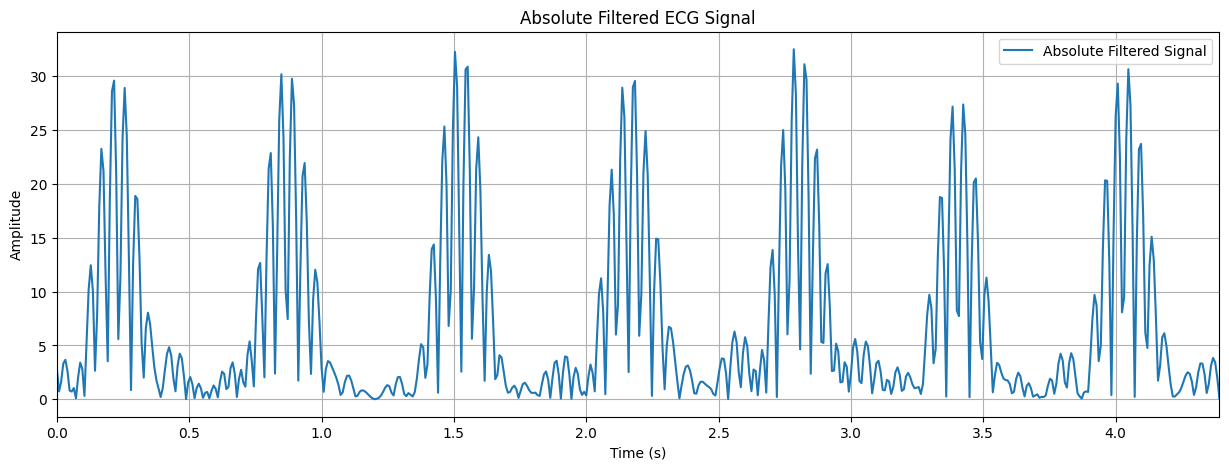

In [9]:
# Absolute

filtered_bandpass_ABS = np.abs(filtered_bandpass)

plt.figure(figsize=(15, 5))
plt.plot(waktu_sinyal, filtered_bandpass_ABS, label='Absolute Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Absolute Filtered ECG Signal')
plt.legend()
plt.grid(True)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.show()


### Moving Average 2 (MAV)

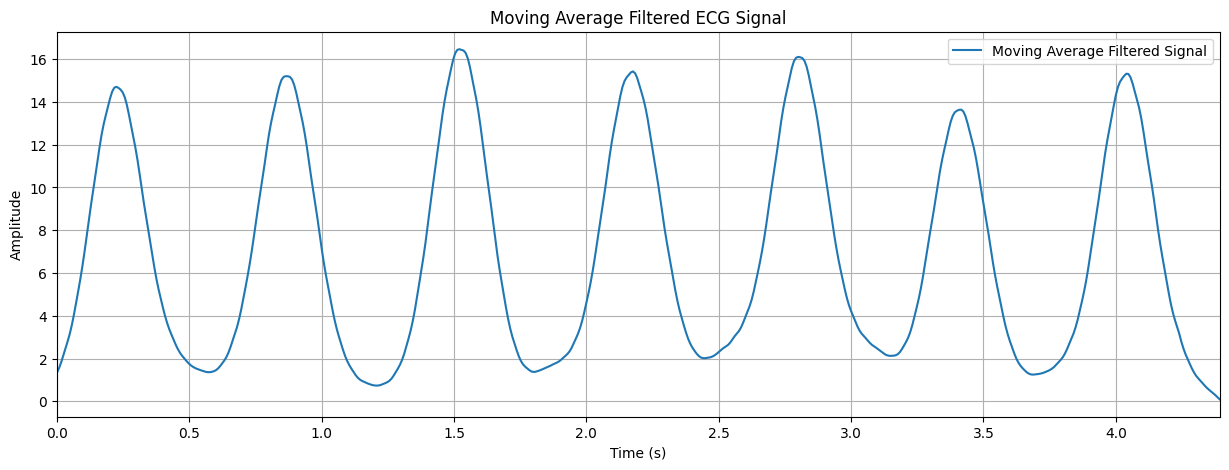

In [10]:
# Moving Average (MAV) Parameters

M_MAV = 20
N = len(filtered_bandpass_ABS)  # Number of data points
df_MAV_abs = np.zeros(N)  # Initialize array to store MAV filtered signal

# Moving Average Filtering
for idx in range(N):
    for shift in range(M_MAV):
        if idx - shift >= 0:
            df_MAV_abs[idx] += filtered_bandpass_ABS[idx - shift]
    df_MAV_abs[idx] /= M_MAV  # Take the average

# Initialize the moving average result arrays
N = len(df_MAV_abs)
df_MAV_backward_MAV = np.zeros(N)
# Moving Average Filter Backward
for idx in range(N):
    for shift in range(M_MAV):
        if idx + shift < N:
            df_MAV_backward_MAV[idx] += df_MAV_abs [idx + shift]
    df_MAV_backward_MAV[idx] /= M_MAV

# Plot Moving Average filtered signal
plt.figure(figsize=(15, 5))
plt.plot(waktu_sinyal, df_MAV_backward_MAV, label='Moving Average Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Moving Average Filtered ECG Signal')
plt.legend()
plt.grid(True)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.show()


### Thresshold Sinyal Absolut

Max value is: 16.46130069007467


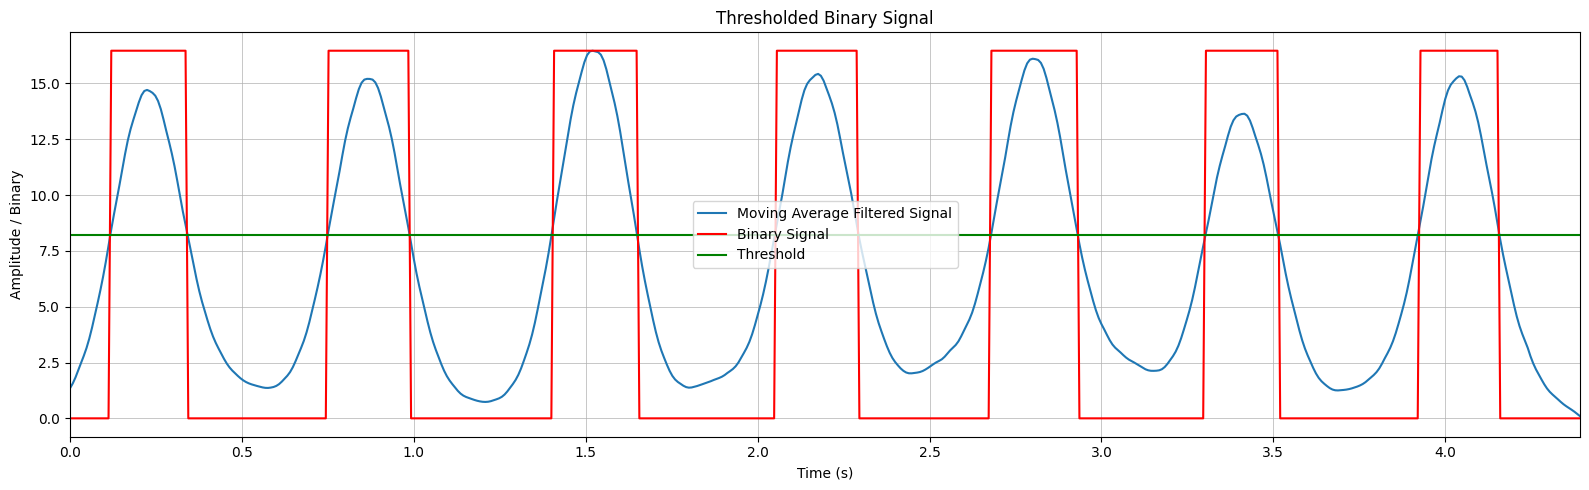

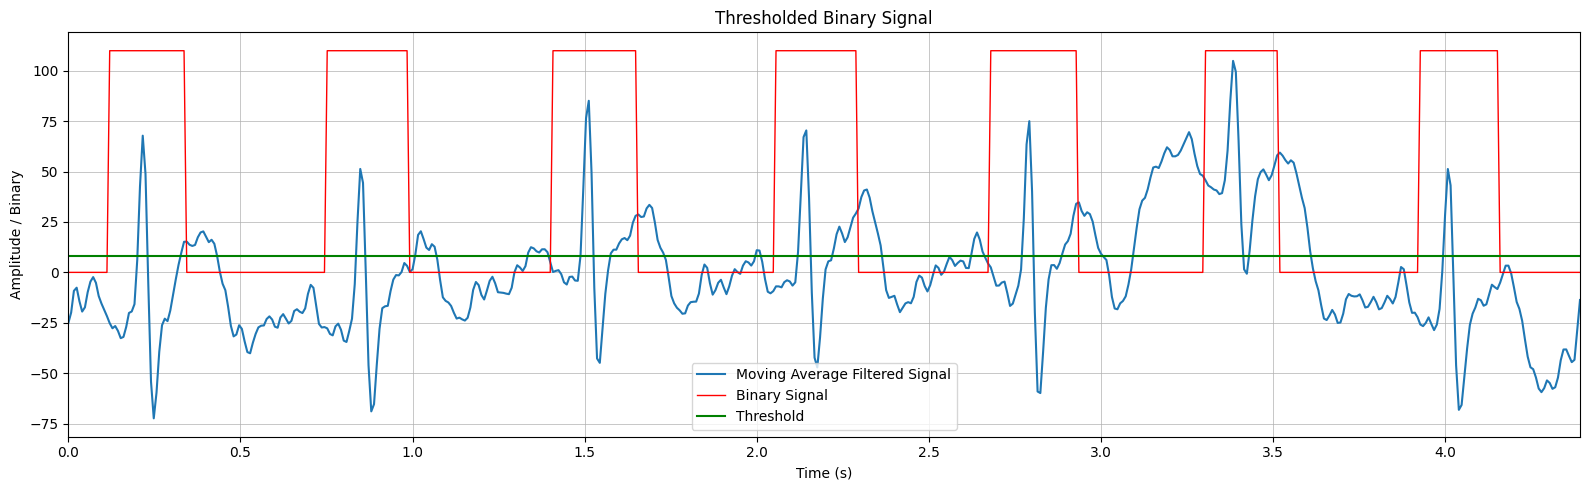

In [11]:
# Thresshold

# Temukan threshold untuk MAV
max_value = df_MAV_backward_MAV.max()
threshold = max_value * 0.5  # Disini saya memakai : 50% dari nilai maksimal
print(f"Max value is: {max_value}")

# Buat bentuk sinyal binary dari hasil threshold
sinyal_kotak = np.where(df_MAV_backward_MAV > threshold, 1, 0)

# Plot binary signal yang ditemukan
plt.figure(figsize=(16, 5))
plt.plot(waktu_sinyal, df_MAV_backward_MAV, label='Moving Average Filtered Signal')
plt.plot(waktu_sinyal, sinyal_kotak * max_value, label='Binary Signal', color='red', linewidth=1.5)
plt.axhline(y=threshold, color='green', label='Threshold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Binary')
plt.title('Thresholded Binary Signal')
plt.legend()
plt.grid(True, which='both', linewidth=0.5)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(waktu_sinyal, df_MAV_backward, label='Moving Average Filtered Signal')
plt.plot(waktu_sinyal, sinyal_kotak * 110, label='Binary Signal', color='red', linewidth=1.0)
plt.axhline(y=threshold, color='green', label='Threshold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Binary')
plt.title('Thresholded Binary Signal')
plt.legend()
plt.grid(True, which='both', linewidth=0.5)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.tight_layout()
plt.show()

### Cari Interval dan BPM

In [12]:
# INTERVAL

# Buat Kerangka Data dari sinyal_kotak biar lebih mudah
df = pd.DataFrame({'sinyal_kotak': sinyal_kotak})

# Identifikasi Puncak R dari sinyal_kotak
df_flags = []
df_RR = []

# Pastikan index ketika - 1 tidak keluar dari batas
for index in range(1, len(df['sinyal_kotak'])):
    if df['sinyal_kotak'][index] == 1 and df['sinyal_kotak'][index - 1] == 0:
        df_flags.append(index / fs)

# Membuat parameter dimana minimal ada 2 puncak sehingga bisa menghitung RR Intervalnya
if len(df_flags) > 1:
    for index in range(1, len(df_flags)):
        df_RR.append(df_flags[index] - df_flags[index - 1])
else:
    print(" R peaks yang terdeteksi tidak cukup untuk melakukan perhitungan RR interval")

# Print RR intervals
print("RR Intervals:", df_RR)

# Hitung Mean Heart Rate nya jika terdapat RR Interval
if df_RR:
    mean_HR = 60 / (sum(df_RR) / len(df_RR))
    print(f"The average heart rate is: {mean_HR:.2f} BPM")
else:
    print("Tidak bisa menghitung BPM karena RR interval yang tidak cukup")


RR Intervals: [0.632, 0.6559999999999999, 0.6480000000000001, 0.6240000000000001, 0.6239999999999997, 0.6240000000000001]
The average heart rate is: 94.54 BPM


## Segmentasi T

### LPF 2 (Sinyal T)

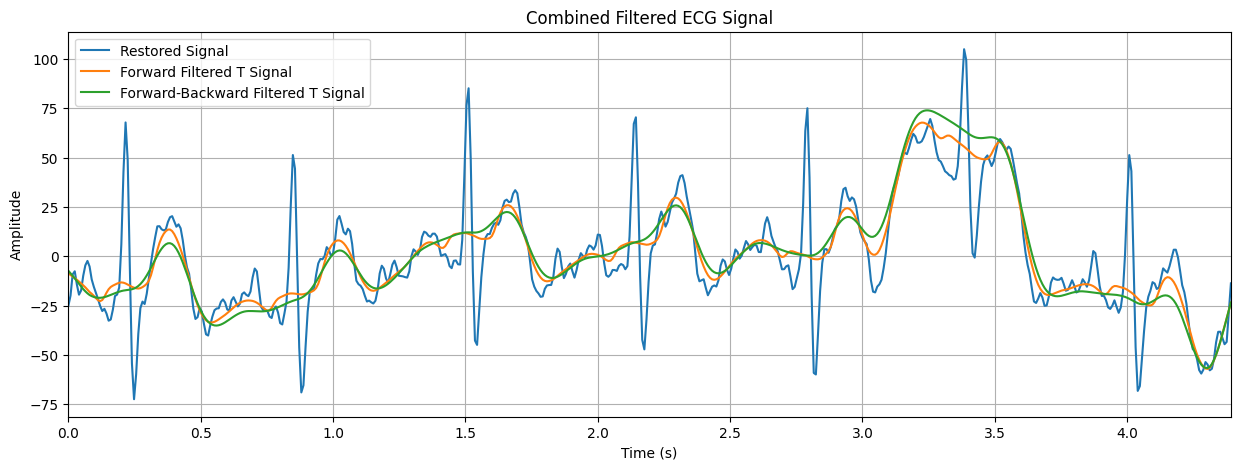

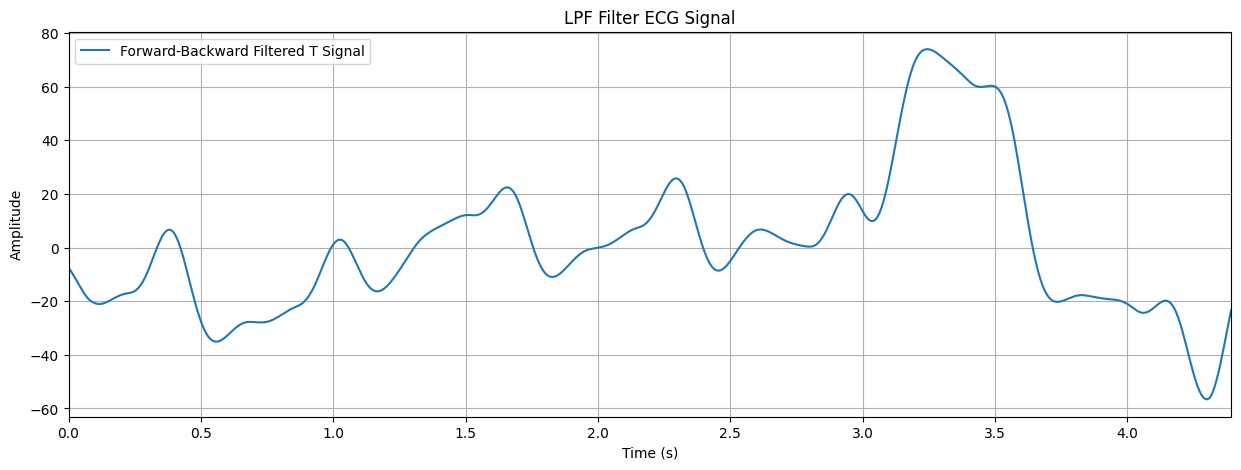

In [13]:

# Parameter
fs = 125  # Frekuensi Sampling (Hz)
M = 10  # Order
fc = 5  # Cutoff frekuensi (Hz) untuk low-pass filter

# Hitung ohm_c cut-off frekuensinya
ohm_c = 2 * np.pi * fc / fs

# Hitung koefisien filter untuk low-pass filter
arr_M = np.arange(-M, M + 1, 1)
h = np.zeros(2 * M + 1)
for n in range(-M, M + 1, 1):
    if n == 0:
        h[n + M] = ohm_c / np.pi
    else:
        h[n + M] = np.sin(n * ohm_c) / (n * np.pi)

# Jumlah Point Data
N = len(df_MAV_backward)

# low-pass filter untuk (Forward Filtering)
x_filtered_forward_t = np.zeros(N)

# Forward Filtering
for i in range(N):
    for j in range(-M, M + 1, 1):
        if 0 <= i - j < N:  # Pastikan index berada pada batasnya
            x_filtered_forward_t[i] += h[j + M] * df_MAV_backward[i - j]

# low-pass filter untuk (Backward Filtering)
x_filtered_backward_t = np.zeros(N)

# Backward Filtering
for i in range(N - 1, -1, -1):
    for j in range(-M, M + 1, 1):
        if 0 <= i + j < N:  # Pastikan index berada pada batasnya
            x_filtered_backward_t[i] += h[j + M] * x_filtered_forward_t[i + j]

# Plot forward and backward filtered ECG signal pada 1 plot yang sama
plt.figure(figsize=(15, 5))

plt.plot(waktu_sinyal, df_MAV_backward, label='Restored Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Restored ECG Signal')
plt.legend()
plt.grid(True)

plt.plot(waktu_sinyal, x_filtered_forward_t, label='Forward Filtered T Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Forward Filtered ECG Signal')
plt.legend()
plt.grid(True)

plt.plot(waktu_sinyal, x_filtered_backward_t, label='Forward-Backward Filtered T Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Combined Filtered ECG Signal')
plt.legend()
plt.grid(True)

plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.show()

# Plot forward and backward filtered ECG signal nya
plt.figure(figsize=(15, 5))
plt.plot(waktu_sinyal, x_filtered_backward_t, label='Forward-Backward Filtered T Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('LPF Filter ECG Signal')
plt.legend()
plt.grid(True)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.show()

### Absolute 1 Sinyal T

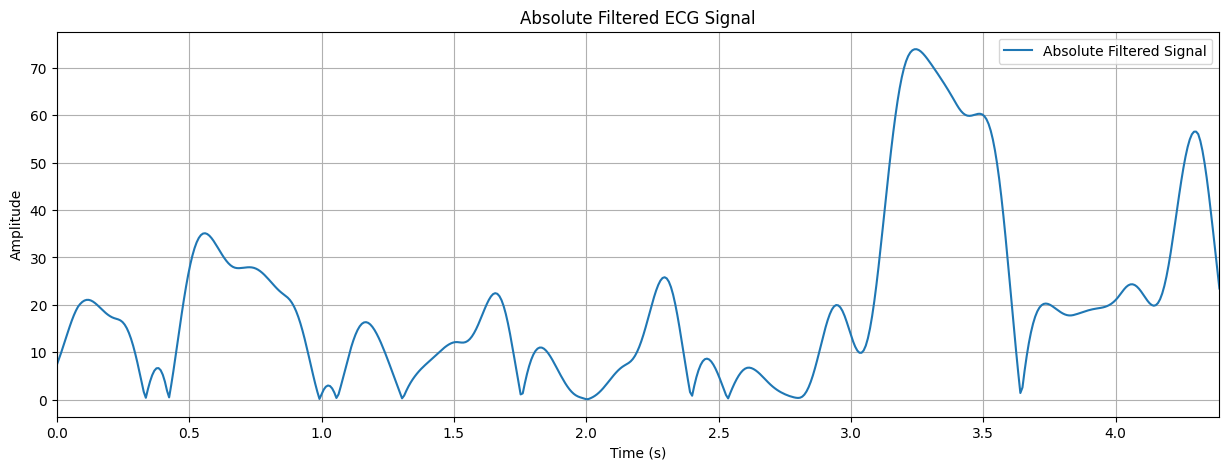

In [14]:
# Absolute

filtered_lpf2__ABS = np.abs(x_filtered_backward_t)

plt.figure(figsize=(15, 5))
plt.plot(waktu_sinyal, filtered_lpf2__ABS, label='Absolute Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Absolute Filtered ECG Signal')
plt.legend()
plt.grid(True)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.show()


### Absolute 2 Sinyal T

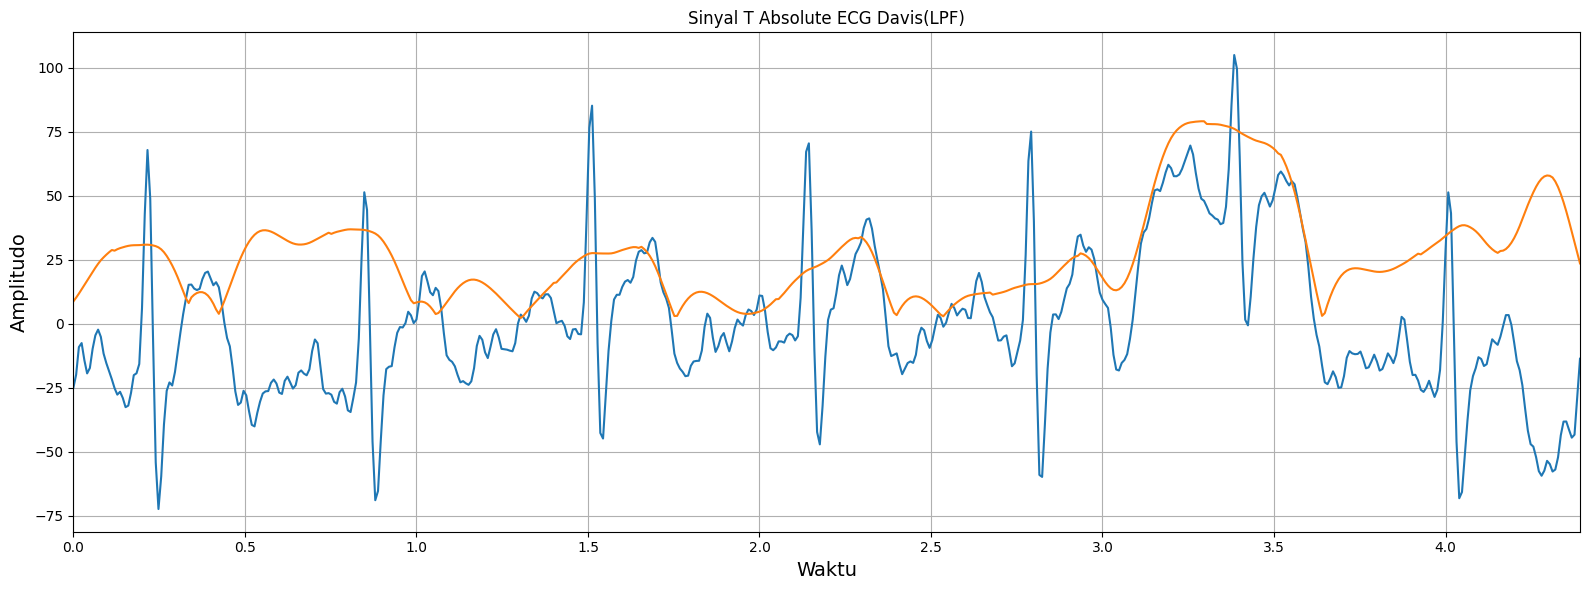

In [15]:
#Hanya Memunculkan Sinyal T

absolut_pass_T = filtered_lpf2__ABS - (sinyal_kotak - df_MAV_backward_MAV)

# Plot the filtered signal
plt.figure(figsize=(16, 6))

plt.plot(waktu_sinyal, df_MAV_backward)
plt.plot(waktu_sinyal, absolut_pass_T)
plt.xlabel('Waktu', fontsize=14)
plt.ylabel('Amplitudo', fontsize=14)
plt.title('Sinyal T Absolute ECG Davis(LPF)')
plt.grid()
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.tight_layout()
plt.show()

### Thressholding Sinyal T

Max value is: 79.07850827419652


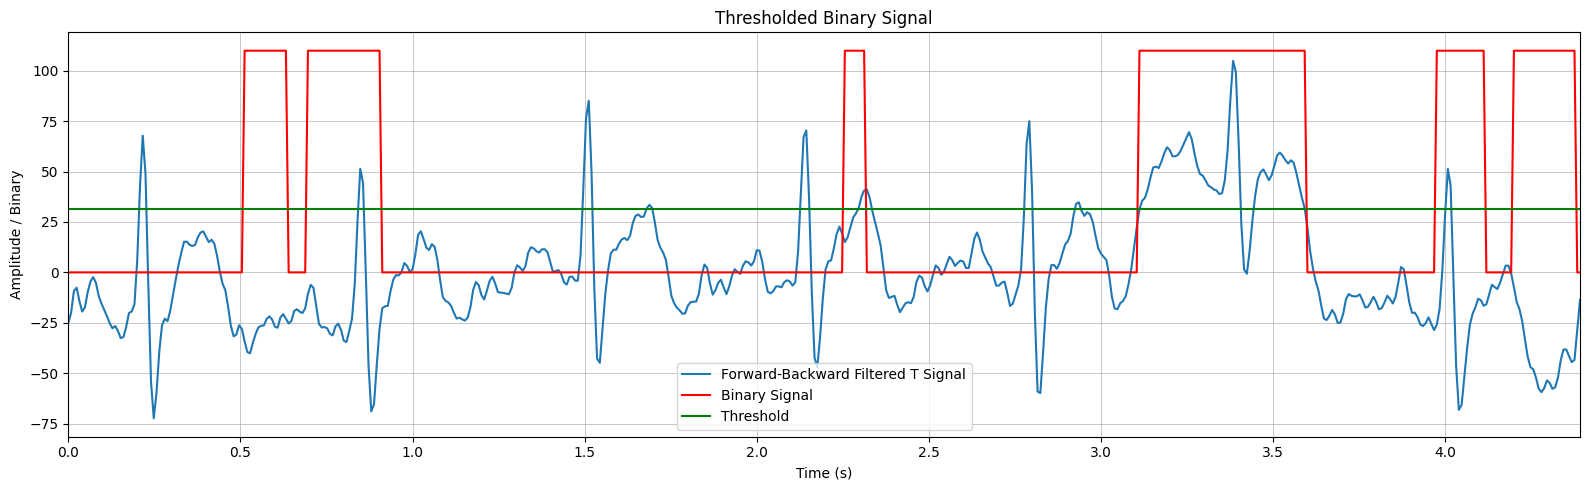

In [16]:

# Calculate the maximum value of the filtered T signal
max_value_t = absolut_pass_T.max()
threshold = max_value_t * 0.4  
print(f"Max value is: {max_value_t}")

# Manually create the binary signal based on the threshold
sinyal_kotak_t = np.zeros_like(absolut_pass_T)
for i in range(len(absolut_pass_T)):
    if absolut_pass_T[i] > threshold:
        sinyal_kotak_t[i] = 1
    elif absolut_pass_T[i] < threshold:
        sinyal_kotak_t[i] = 0

# Plot the binary signal
plt.figure(figsize=(16, 5))
plt.plot(waktu_sinyal, df_MAV_backward, label='Forward-Backward Filtered T Signal')
plt.plot(waktu_sinyal, sinyal_kotak_t * 110, label='Binary Signal', color='red', linewidth=1.5)
plt.axhline(y=threshold, color='green', label='Threshold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Binary')
plt.title('Thresholded Binary Signal')
plt.legend()
plt.grid(True, which='both', linewidth=0.5)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.tight_layout()
plt.show()


## Alternatif Segmentasi T

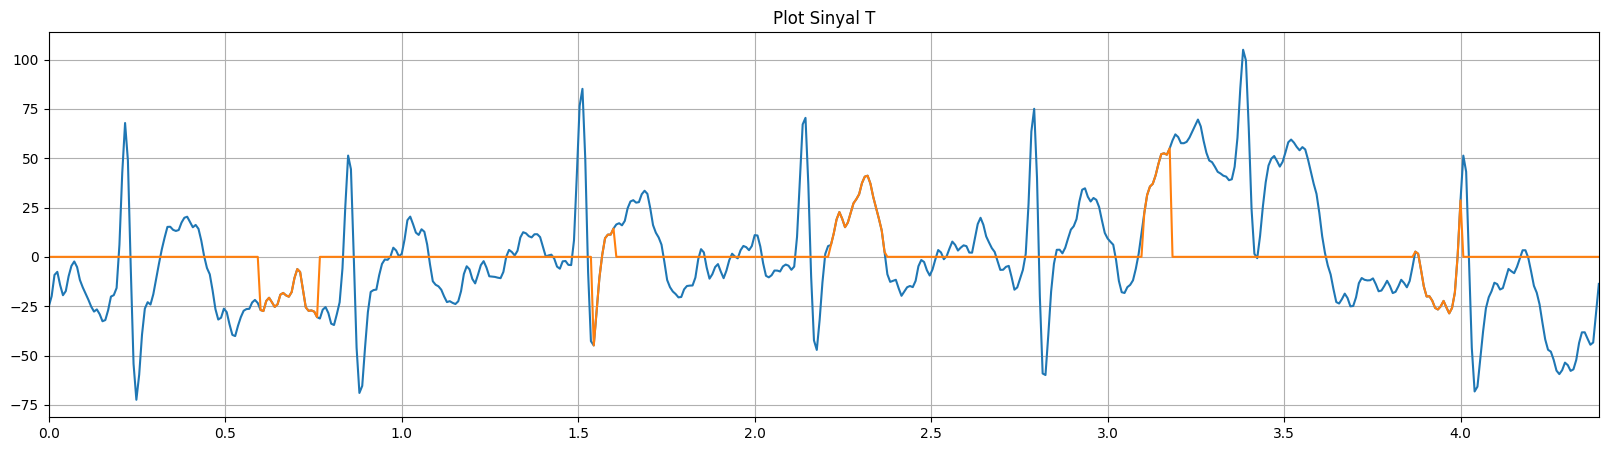

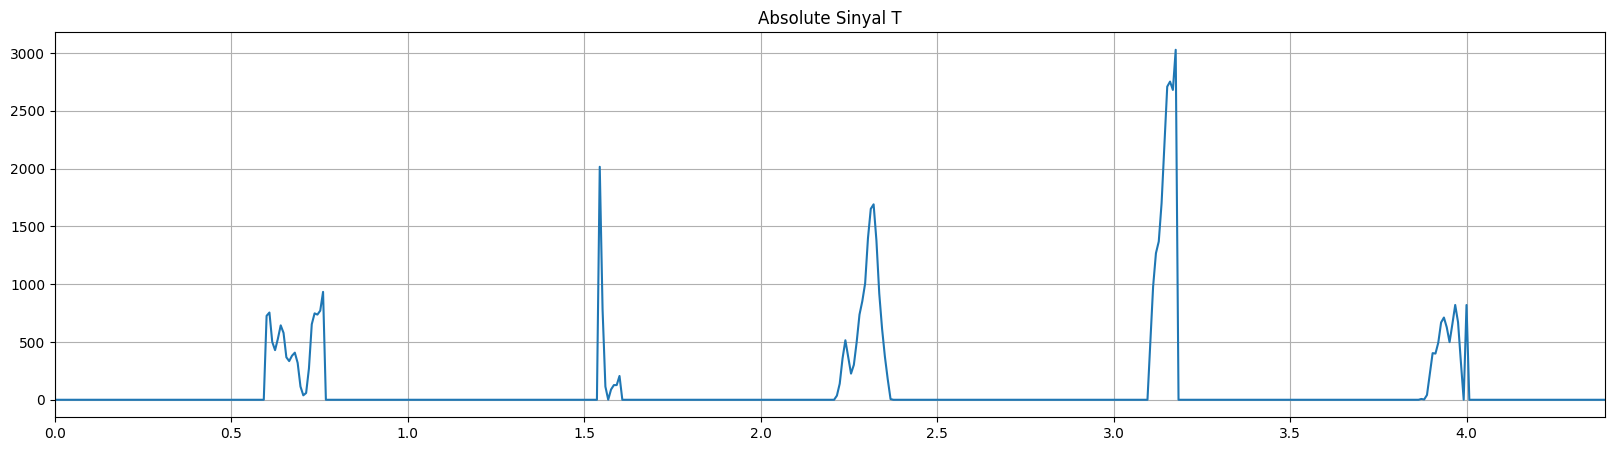

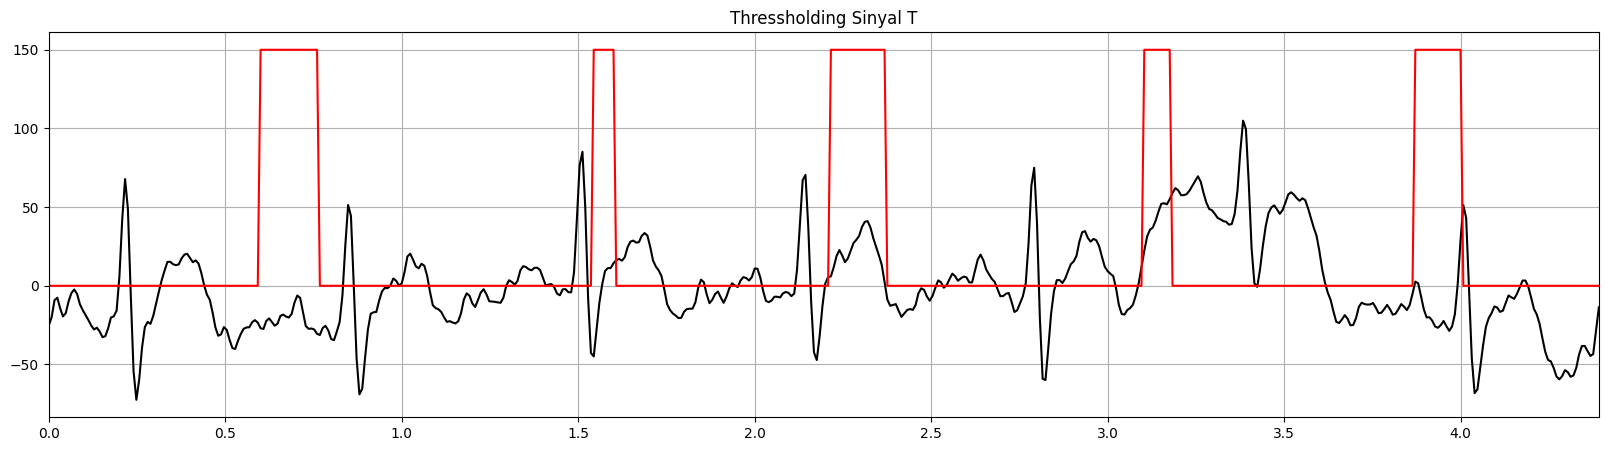

In [17]:
# Segmentasi Sinyal T (Alternatif) 

xt = waktu_sinyal

segmenT_sinyal = []

segmenT_sinyal = np.zeros(len(waktu_sinyal))

# Davis
for i in range(len(waktu_sinyal)):
    if xt[i]>=0.6 and xt[i]<=0.76:
        segmenT_sinyal[i]=df_MAV_backward[i]
    elif xt[i]>=1.54 and xt[i]<=1.60:
        segmenT_sinyal[i]=df_MAV_backward[i]
    elif xt[i]>=2.21 and xt[i]<=2.37:
        segmenT_sinyal[i]=df_MAV_backward[i]
    elif xt[i]>=3.10 and xt[i]<=3.18:
        segmenT_sinyal[i]=df_MAV_backward[i]
    elif xt[i]>=3.87 and xt[i]<=4.0:
        segmenT_sinyal[i]=df_MAV_backward[i]
    else:
        segmenT_sinyal[i]=0


plt.figure(figsize=(20, 5))
plt.plot(waktu_sinyal, df_MAV_backward)
plt.plot(waktu_sinyal, segmenT_sinyal)
plt.title('Plot Sinyal T')
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.grid(True)
plt.show()

# Absolut Sinyal T
absolutT_sinyal = np.zeros(len(segmenT_sinyal))
for i in range(len(absolutT_sinyal)):
    absolutT_sinyal[i] = segmenT_sinyal[i] * segmenT_sinyal[i]

plt.figure(figsize=(20, 5))
plt.plot(waktu_sinyal, absolutT_sinyal)
plt.title('Absolute Sinyal T')
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.grid(True)
plt.show()

# Thresshold Sinyal T nya
thressholdT_sinyal = np.zeros(np.size(absolutT_sinyal))

for i in range(len(thressholdT_sinyal)):
    if absolutT_sinyal[i] > 0:
        thressholdT_sinyal[i] = 150
    else:
        thressholdT_sinyal[i] = 0

# Plot Sinyal T
plt.figure(figsize=(20,5))
plt.plot(waktu_sinyal, df_MAV_backward, color="black")
plt.plot(waktu_sinyal, thressholdT_sinyal, color="red")
plt.title('Thressholding Sinyal T')
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.grid(True)
plt.show()

## Plot Segmentasi Sinyal QRS dan T

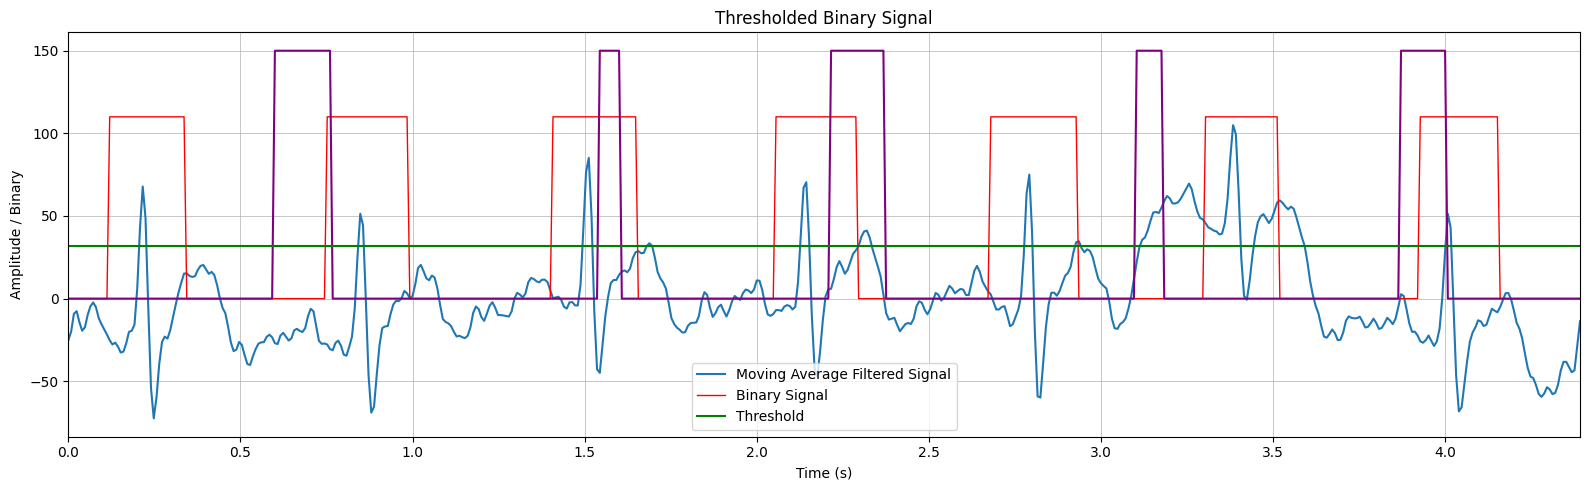

In [18]:
plt.figure(figsize=(16, 5))
plt.plot(waktu_sinyal, df_MAV_backward, label='Moving Average Filtered Signal')
plt.plot(waktu_sinyal, sinyal_kotak * 110, label='Binary Signal', color='red', linewidth=1.0)
plt.plot(waktu_sinyal, thressholdT_sinyal, color="purple")
plt.axhline(y=threshold, color='green', label='Threshold')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Binary')
plt.title('Thresholded Binary Signal')
plt.legend()
plt.grid(True, which='both', linewidth=0.5)
plt.xlim(waktu_sinyal.min(), waktu_sinyal.max())
plt.tight_layout()
plt.show()